### Load Library

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from keras.models import load_model

from misc.mc_dnn import DNN
instance = DNN()

# x_train, y_train, x_validation, y_validation 
# train_data, train_label, test_data, test_label

Using TensorFlow backend.


### Load Data - Extrapolation

In [2]:
train_path = '/Users/mingyu/Desktop/co2/train.h5'
test_path = '/Users/mingyu/Desktop/co2/test.h5'

In [22]:
# Trainig Data 
with h5py.File(train_path, 'r') as train_file:
    train_data = np.array(train_file['data'])
    train_label = np.array(train_file['label'])

# Testing Data 
with h5py.File(test_path, 'r') as test_file:
    test_data = np.array(test_file['data'])
#     test_label = np.array(test_file['label'])
# plt.plot(test_data, test_label)

# All Data 
all_data = np.concatenate((train_data, test_data), axis = 0)

### DNN

In [4]:
# dnn_model = instance.build_dnn_model(train_data, train_label)
# dnn_model.save('/Users/mingyu/Desktop/co2/dnn_model_co2.h5')

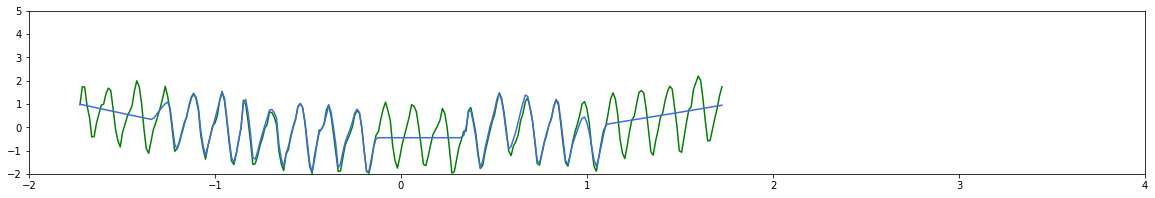

In [34]:
dnn_model = load_model('/Users/mingyu/Desktop/co2/dnn_model_co2.h5')
dnn_model_train_pred = dnn_model.predict(train_data)

plt.rcParams["figure.figsize"] = (20,3)
plt.xlim((-2, 4))
plt.ylim((-2, 5))
plt.plot(train_data, train_label, 'g')
plt.plot(train_data, dnn_model_train_pred, 'royalblue')

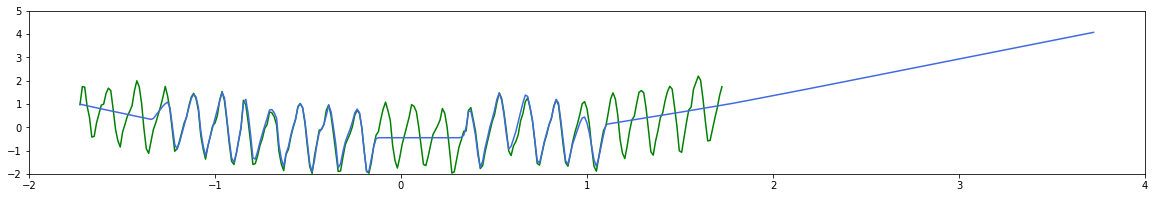

In [35]:
dnn_model_all_pred = dnn_model.predict(all_data)

plt.rcParams["figure.figsize"] = (20,3)
plt.xlim((-2, 4))
plt.ylim((-2, 5))
plt.plot(train_data, train_label, 'g')
plt.plot(all_data, dnn_model_all_pred, 'royalblue')

### mc_DNN

In [7]:
# mc_dnn_model = instance.build_mc_dnn_model(train_data, train_label)
# mc_dnn_model.save('/Users/mingyu/Desktop/co2/mc_dnn_model_co2.h5')

272/272 [==============================] - 1s 2ms/step


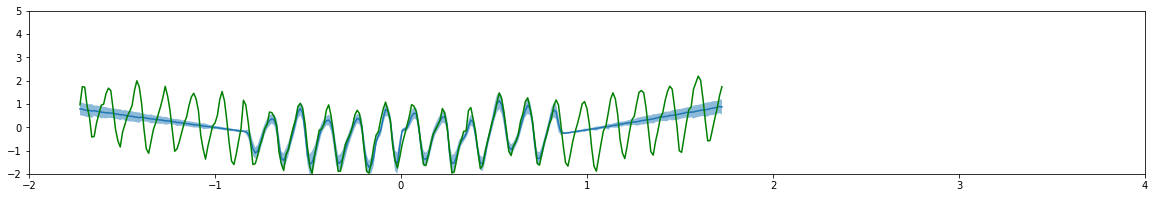

In [36]:
mc_dnn_model = load_model('/Users/mingyu/Desktop/co2/mc_dnn_model_co2.h5')
standard_pred, MC_pred, MC_std = instance.predict(train_data, mc_dnn_model)
MC_pred_high = (MC_pred + MC_std).reshape(-1)
MC_pred_low = (MC_pred - MC_std).reshape(-1)
train_data = train_data.reshape(-1)

plt.rcParams["figure.figsize"] = (20,3)
plt.xlim((-2, 4))
plt.ylim((-2, 5))
plt.plot(train_data, MC_pred)
plt.plot(train_data, train_label, 'g')
plt.fill_between(train_data, y1=MC_pred_high, y2=MC_pred_low, alpha=0.5)

1272/1272 [==============================] - 0s 59us/step


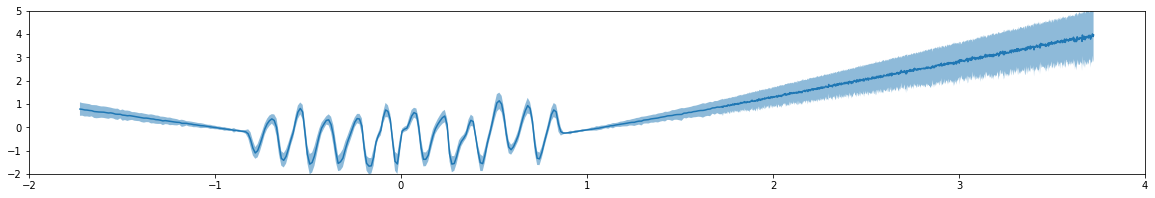

In [20]:
standard_pred, MC_pred, MC_std = instance.predict(all_data, mc_dnn_model)
MC_pred_high = (MC_pred + MC_std).reshape(-1)
MC_pred_low = (MC_pred - MC_std).reshape(-1)
all_data = all_data.reshape(-1)

plt.rcParams["figure.figsize"] = (20,3)
plt.xlim((-2, 4))
plt.ylim((-2, 5))
plt.plot(all_data, MC_pred)
plt.fill_between(all_data, y1=MC_pred_high, y2=MC_pred_low, alpha=0.5)